In [1]:
import source.utilities as util
import source.loader as load
import source.analyzer as analyzer

Total Income: 13069.91
Income: category
INCOME    13068.57
OTHER         1.34
Name: transaction, dtype: float64
+-----+---------------------+-------------+----------------------------------------------------------------------------------------+----------+
|     |        date         | transaction |                                      description                                       | category |
+-----+---------------------+-------------+----------------------------------------------------------------------------------------+----------+
| 127 | 2023-11-27 00:00:00 |   294.51    |                 BKOFAMERICA MOBILE 11/25 XXXXX44436 DEPOSIT *MOBILE NY                 |  INCOME  |
| 122 | 2023-11-15 00:00:00 |   1000.0    | E6XUNITED TECHNO DES:DIRECT DEP ID:XXXXX9041227E6X INDN:CHEN,ZIAN CO ID:XXXXX11103 PPD |  INCOME  |
| 130 | 2023-11-30 00:00:00 |   1000.0    | E6XUNITED TECHNO DES:DIRECT DEP ID:XXXXX6343874E6X INDN:CHEN,ZIAN CO ID:XXXXX11103 PPD |  INCOME  |
| 22  | 2023-11-15 00:00

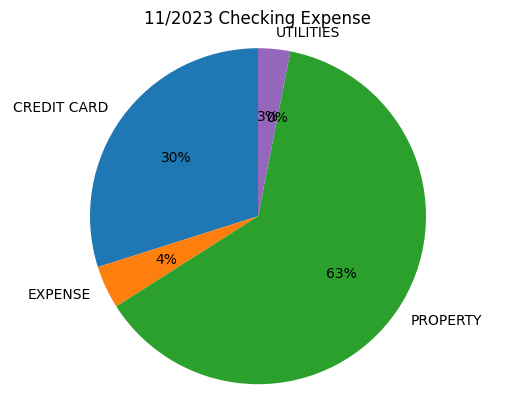

In [2]:
analyzer.analyzeChecking(11, 2023)

Total Expense: 1597.47
Expense: category
COMMUTE           23.20
DINING           351.46
ENTERTAINMENT     28.00
GROCERY          217.92
OTHER            419.30
SHOPPING         498.95
SUBSCRIPTION      10.85
UTILITIES         47.79
Name: transaction, dtype: float64
Category: category
COMMUTE           1.45%
DINING            22.0%
ENTERTAINMENT     1.75%
GROCERY          13.64%
OTHER            26.25%
SHOPPING         31.23%
SUBSCRIPTION      0.68%
UTILITIES         2.99%
Name: transaction, dtype: object


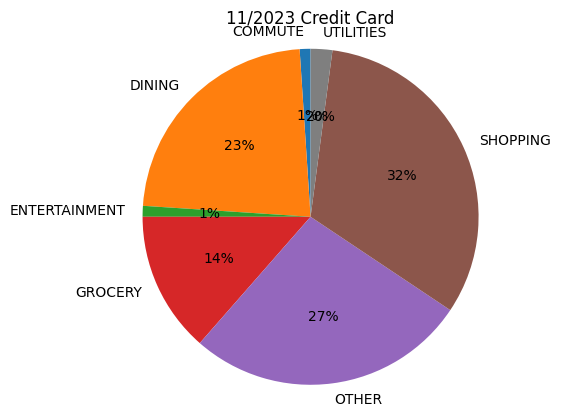

In [31]:
analyzer.analyzeCreditCard(11, 2023)

+-----+---------------------+--------------------------------------------+-------------+---------------+
|     |        date         |                description                 | transaction |   category    |
+-----+---------------------+--------------------------------------------+-------------+---------------+
| 190 | 2023-01-28 00:00:00 | AplPay TACO BELL    NEW HYDE PARK       NY |    5.43     |    DINING     |
| 196 | 2023-01-18 00:00:00 | AplPay TACO BELL    NEW HYDE PARK       NY |    5.54     |    DINING     |
| 174 | 2023-02-15 00:00:00 | AplPay TACO BELL    NEW HYDE PARK       NY |    5.54     |    DINING     |
| 204 | 2023-01-08 00:00:00 | MCDONALD'S          NEW HYDE PARK       NY |     6.4     |    DINING     |
| 202 | 2023-01-11 00:00:00 | POPEYES 2415 0000   QUEENS VILLAG       NY |    10.88    |    DINING     |
| 137 | 2023-03-21 00:00:00 | MCDONALD'S 12000    SEA CLIFF           NY |    12.36    |    DINING     |
| 186 | 2023-02-01 00:00:00 | AplPay BURGER KING  GARDE

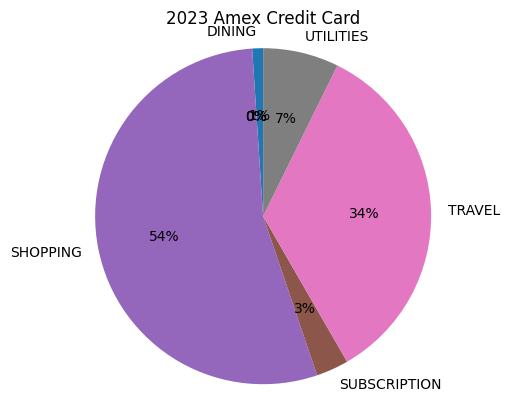

In [27]:
# Import AMEX
amexDf = load.importAmex('./input/credit/amex/12_2023.csv');
df = util.sanitizeDataframe(amexDf, sortBy='transaction');

# df.loc[:, 'transaction'] = df['transaction'].abs()
# df = df.sort_values(by=['category', 'transaction'])
# print(tabulate(df, headers='keys', tablefmt='pretty'))

# # Format the DataFrame as a table using tabulate
# formatted_table = tabulate(df, headers='keys', tablefmt='pretty')

# # Save the formatted table to a text file
# with open('./output/amex_credit_2023.txt', 'w') as file:
#     file.write(formatted_table)

# making transactions to be positive
# df = filter_df_at_month(df)
util.exportDataframe(df, 'amex')

totalExpense = df.groupby('category')['transaction'].sum()
print(f'Expense: {totalExpense}')

util.plotDataframe(df, '2023 Amex Credit Card')

Expense: category
COMMUTE           -34.80
DINING           -822.99
ENTERTAINMENT     -44.28
GROCERY          -268.40
HEALTH CARE     -1337.66
OTHER            -493.49
SERVICE          -494.44
SHOPPING         -267.02
UTILITIES        -122.79
Name: transaction, dtype: float64


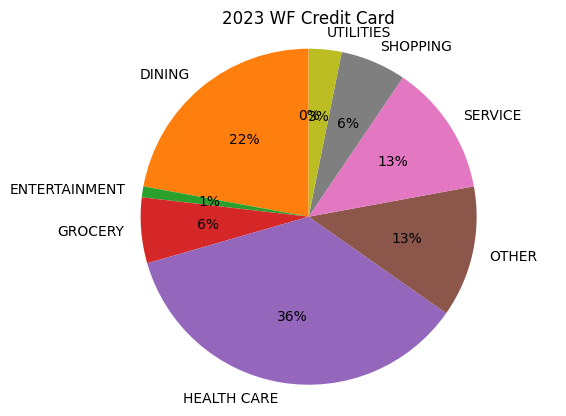

In [4]:
# Import Wells Fargo
wfDf = load.importWF('./input/wf_credit_2023.csv');
df = util.sanitizeDataframe(wfDf);

# making transactions to be positive
# df = filter_df_at_month(df)
util.exportDataframe(df, 'wf')

totalExpense = df.groupby('category')['transaction'].sum()
print(f'Expense: {totalExpense}')

util.plotDataframe(df, '2023 WF Credit Card')